<a href="https://colab.research.google.com/github/GreNinja47/Gender-Age-Predicting-CCN-Model-/blob/main/CNN_age_gender_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

# Upload kaggle.json file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d jangedoo/utkface-new

 96% 318M/331M [00:01<00:00, 254MB/s]
100% 331M/331M [00:01<00:00, 255MB/s]


In [ ]:
import zipfile
zip = zipfile.ZipFile("/content/utkface-new.zip",'r')
zip.extractall("/content")
zip.close()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

In [ ]:
!pip install keras-tuner
import keras_tuner
from tensorflow import keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.4 MB/s eta 0:00:00


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
folder_path = '/content/utkface_aligned_cropped/UTKFace'

In [ ]:
age=[]

gender=[]

img =[]

for file in os.listdir(folder_path):
  age.append(int(file.split('_')[0]))
  gender.append(int(file.split('_')[1]))
  img.append(file)

In [ ]:
print(len(age))
print(len(gender))
print(len(img))

23708
23708
23708


In [ ]:
df = pd.DataFrame({'age':age,'gender':gender,'img':img})

In [ ]:
rows_to_delete = df['img'].str.contains('30_0_0_20170117153441021.jpg.chip.jpg|16_0_4_20170104011805376.jpg.chip.jpg')

df = df[~rows_to_delete]

In [ ]:
df.head()

,age,gender,img
0,24,0,24_0_1_20170116000638538.jpg.chip.jpg
1,60,0,60_0_0_20170117001131850.jpg.chip.jpg
2,24,0,24_0_1_20170113134107281.jpg.chip.jpg
3,4,1,4_1_0_20170109193059401.jpg.chip.jpg
4,56,1,56_1_0_20170110154644528.jpg.chip.jpg


Age: 24
Gender: 0


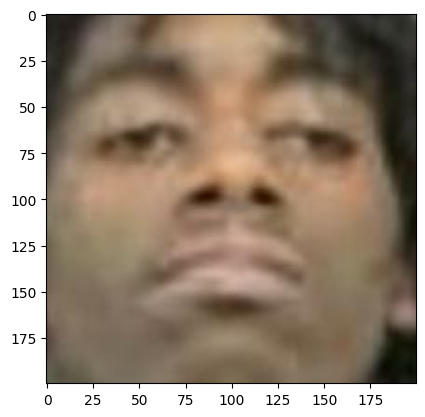

In [ ]:
import matplotlib.image as mpimg

img = Image.open("UTKFace/"+df.img[0])
plt.imshow(img)

# Display the image
plt.imshow(img)

# Print metadata
print("Age:", df['age'][0])
print("Gender:", df['gender'][0])

Age: 24
Gender: 0


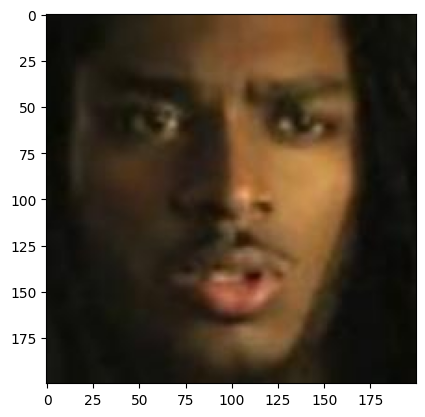

In [ ]:
img = Image.open("UTKFace/"+df.img[2])
plt.imshow(img)

# Display the image
plt.imshow(img)

# Print metadata
print("Age:", df['age'][2])
print("Gender:", df['gender'][2])

Age: 2
Gender: 1


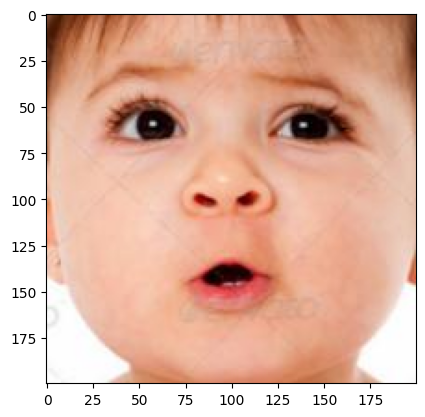

In [ ]:
img = Image.open("UTKFace/"+df.img[9])
plt.imshow(img)

# Display the image
plt.imshow(img)

# Print metadata
print("Age:", df['age'][9])
print("Gender:", df['gender'][9])

Age: 56
Gender: 1


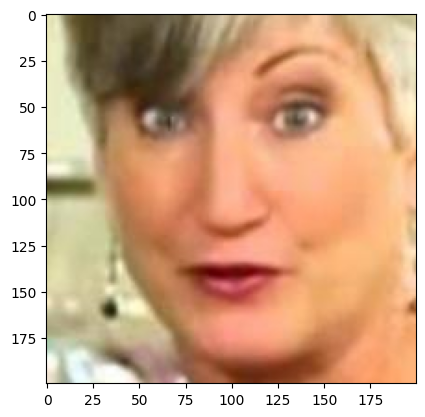

In [ ]:
img = Image.open("UTKFace/"+df.img[4])
plt.imshow(img)

# Display the image
plt.imshow(img)

# Print metadata
print("Age:", df['age'][4])
print("Gender:", df['gender'][4])

In [ ]:
# Define the age intervals
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120]

# Create age bins using pd.cut()
age_bins = pd.cut(df['age'], bins=bins)

# Calculate the value counts
value_counts = age_bins.value_counts(normalize=True)

# Sort the value counts by the age intervals
sorted_counts = value_counts.sort_index()

# Print the sorted value counts
print(sorted_counts)

(0, 5]        0.099679
(5, 10]       0.036067
(10, 15]      0.025732
(15, 20]      0.044208
(20, 25]      0.116426
(25, 30]      0.211887
(30, 35]      0.103181
(35, 40]      0.079853
(40, 45]      0.046191
(45, 50]      0.042394
(50, 55]      0.051970
(55, 60]      0.041298
(60, 65]      0.029444
(65, 70]      0.019995
(70, 75]      0.015777
(75, 80]      0.013119
(80, 85]      0.010926
(85, 90]      0.008184
(90, 95]      0.001223
(95, 100]     0.001561
(100, 105]    0.000337
(105, 110]    0.000211
(110, 115]    0.000169
(115, 120]    0.000169
Name: age, dtype: float64


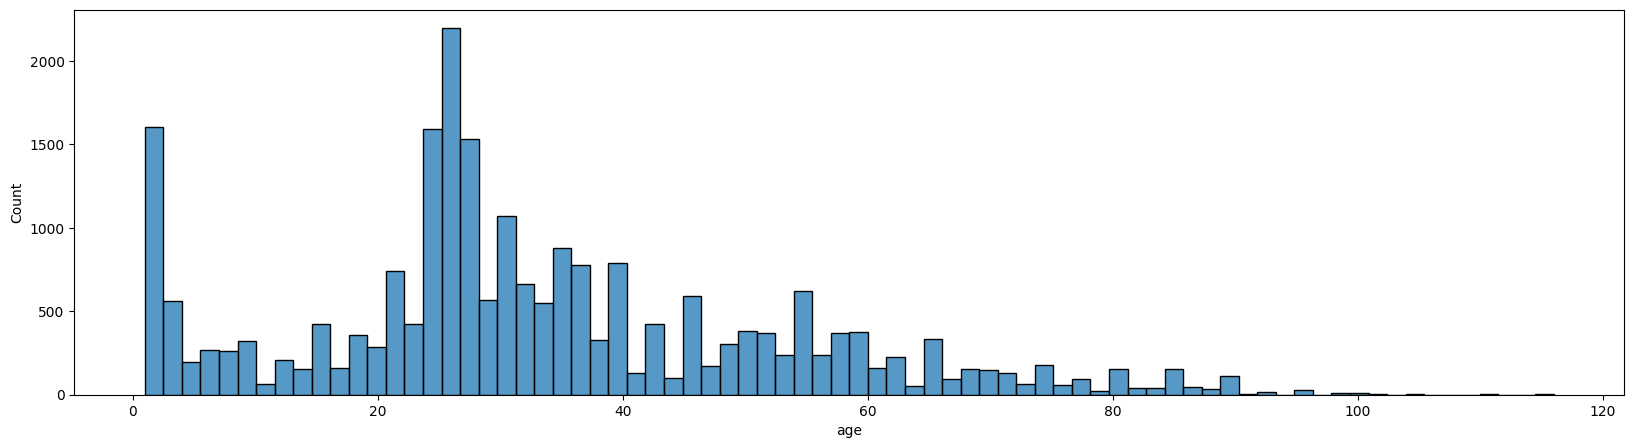

In [ ]:
plt.figure(figsize=(20, 5))
sns.histplot(df['age'])
plt.show()

Observation :

We see the data density spread reducing post 85 years as the avaiablity of the images would be less.

The Age group 25-30 years, 20-25 years, 30-35 years and 0-5 years are seen in max density

The lesser fraction of data needs to be collected from above large density ages to ensure model can better distiguish between all age groups





Observation : We see the data for childrens around 1 and adults around have  25-30 years having more data and data below 90-100 are extremely low

In [ ]:
df['age'][df['age'] >= 85].count()

436

In [ ]:
df = df[df['age'] < 85]

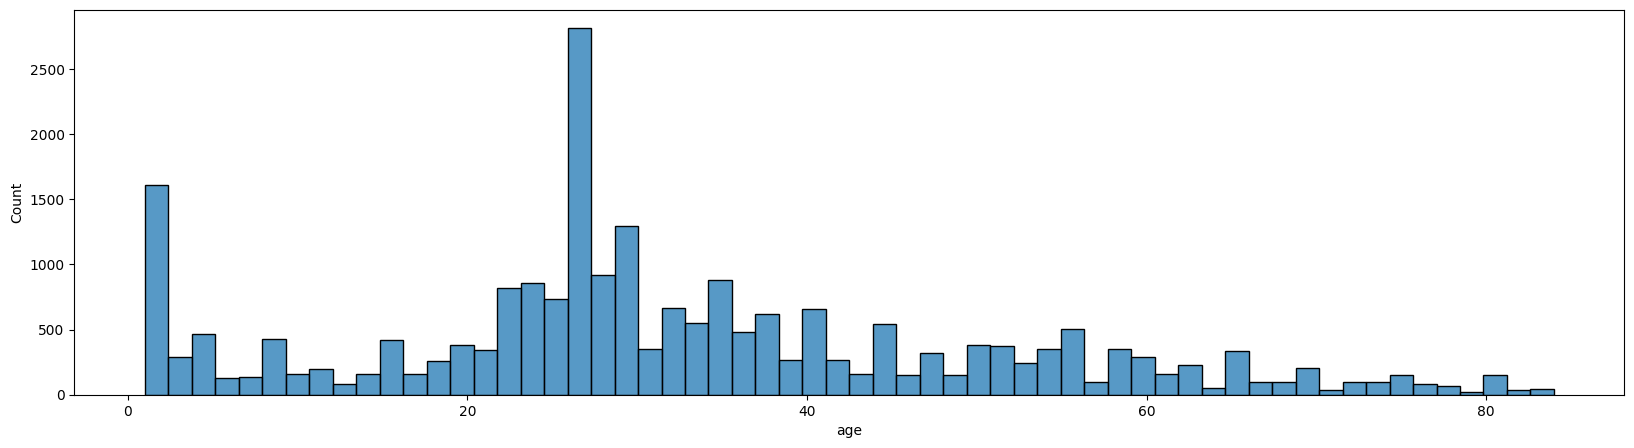

In [ ]:
plt.figure(figsize=(20, 5))
sns.histplot(df['age'])
plt.show()

In [ ]:
df['age'].value_counts()

26    2197
1     1123
28     918
35     880
24     859
25     734
30     723
32     664
27     615
29     570
40     526
36     483
2      482
45     440
23     426
34     409
22     395
50     381
54     353
31     350
21     346
38     325
37     293
60     293
3      289
20     284
4      273
58     271
55     268
39     266
42     266
8      263
18     262
65     259
16     246
53     241
56     236
52     232
5      196
15     177
47     170
9      166
61     161
17     158
14     157
43     157
10     156
46     153
48     153
75     148
49     148
70     147
33     143
7      139
51     138
80     133
41     132
6      131
12     130
62     125
63     103
68     100
44     100
72      98
19      98
57      97
67      94
59      82
13      81
66      77
78      69
11      65
73      63
76      58
69      56
64      50
82      40
71      33
74      32
77      28
84      24
79      23
81      22
83      18
Name: age, dtype: int64

In [ ]:
resampled_ages = []

# Defined ages
ages_to_check = [26, 1, 28, 35, 24, 25, 30, 32, 27, 29, 40]

# Looping through the DataFrame and append rows where age is in the specified list
for i in range(len(df)):
    if df['age'].iloc[i] in ages_to_check:
        resampled_ages.append(df.iloc[i])

# Convert the list of matching rows to a DataFrame
resampled_ages_df = pd.DataFrame(resampled_ages)

# Sampling 30% of the DataFrame where ages are in the specified list
resampled_ages_df = resampled_ages_df.sample(frac=0.3)

# Filter the original DataFrame to exclude rows where age is in the specified list
df = df[~df['age'].isin(ages_to_check)]

# Concatenate the original DataFrame and the sampled DataFrame
df = pd.concat([df, resampled_ages_df], ignore_index=True)

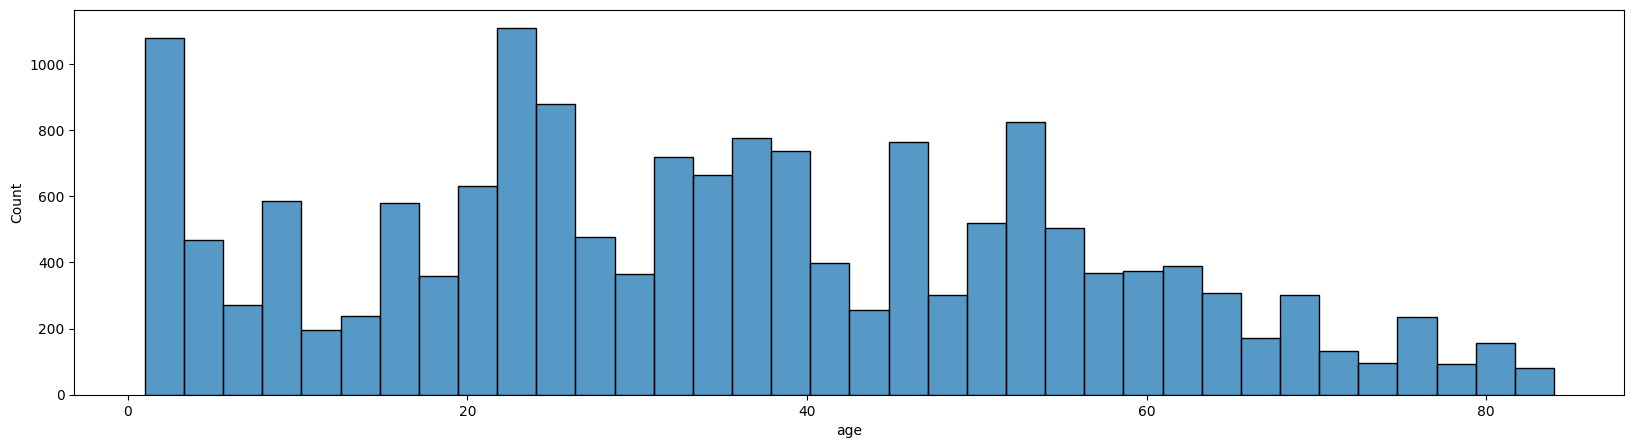

In [ ]:
plt.figure(figsize=(20, 5))
sns.histplot(df['age'])
plt.show()

In [ ]:
df['age'].value_counts()

26    681
36    483
2     482
45    440
23    426
34    409
22    395
50    381
54    353
31    350
21    346
38    325
1     309
28    295
60    293
37    293
3     289
24    288
20    284
4     273
58    271
55    268
39    266
42    266
8     263
18    262
65    259
35    255
16    246
53    241
56    236
52    232
32    225
30    203
25    198
5     196
27    181
15    177
47    170
9     166
29    163
61    161
17    158
43    157
14    157
10    156
46    153
48    153
49    148
75    148
70    147
40    145
33    143
7     139
51    138
80    133
41    132
6     131
12    130
62    125
63    103
44    100
68    100
19     98
72     98
57     97
67     94
59     82
13     81
66     77
78     69
11     65
73     63
76     58
69     56
64     50
82     40
71     33
74     32
77     28
84     24
79     23
81     22
83     18
Name: age, dtype: int64

<Axes: xlabel='gender', ylabel='Count'>

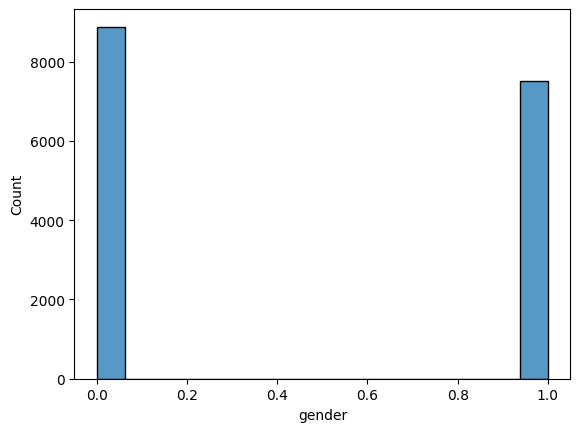

In [ ]:
sns.histplot(df['gender'])

In [ ]:
train_df = df.sample(frac=0.8, random_state=0)
test_df = df.drop(train_df.index)

In [ ]:
train_df.shape, test_df.shape

((13123, 3), (3281, 3))

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator_age = train_datagen.flow_from_dataframe(train_df,
                                                    directory=folder_path,
                                                    x_col='img',
                                                    y_col='age',
                                                    target_size=(180,180),
                                                    batch_size=32,
                                                    class_mode='raw')

test_generator_age = test_datagen.flow_from_dataframe(test_df,
                                                    directory=folder_path,
                                                    x_col='img',
                                                    y_col='age',
                                                    target_size=(180,180),
                                                    batch_size=32,
                                                    class_mode='raw')

Found 13123 validated image filenames.
Found 3281 validated image filenames.


In [ ]:
# Define the input layer
inputs = Input(shape=(180, 180, 3))
x = Rescaling(1./255)(inputs)

# First Convolutional layer with batch normalization
x = Conv2D(32, kernel_size=(3,3), activation='relu', kernel_initializer="he_normal", padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)

# Second Convolutional layer with batch normalization
x = Conv2D(64, kernel_size=(3,3), activation='relu', kernel_initializer="he_normal", padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)

# Third Convolutional layer with batch normalization
x = Conv2D(64, kernel_size=(3,3), activation='relu', kernel_initializer="he_normal", padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)

# Fourth Convolutional layer with batch normalization
x = Conv2D(128, kernel_size=(3,3), activation='relu', kernel_initializer="he_normal", padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Dropout(0.45)(x)

# Fifth Convolutional layer with batch normalization
x = Conv2D(128, kernel_size=(3,3), activation='relu', kernel_initializer="he_normal", padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Dropout(0.45)(x)

# Sixth Convolutional layer with batch normalization
x = Conv2D(256, kernel_size=(3,3), activation='relu', kernel_initializer="he_normal", padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Dropout(0.45)(x)

# Flatten Layer
x = Flatten()(x)

# Branch 1
dense1 = Dense(128, activation='relu')(x)
dense1 = BatchNormalization()(dense1)
dense1 = Dropout(0.4)(dense1)

output1 = Dense(1, activation='linear', name='age')(dense1)

# Define the model
model_age = Model(inputs=inputs, outputs=[output1])

In [ ]:
model_age.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 90, 90, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496 

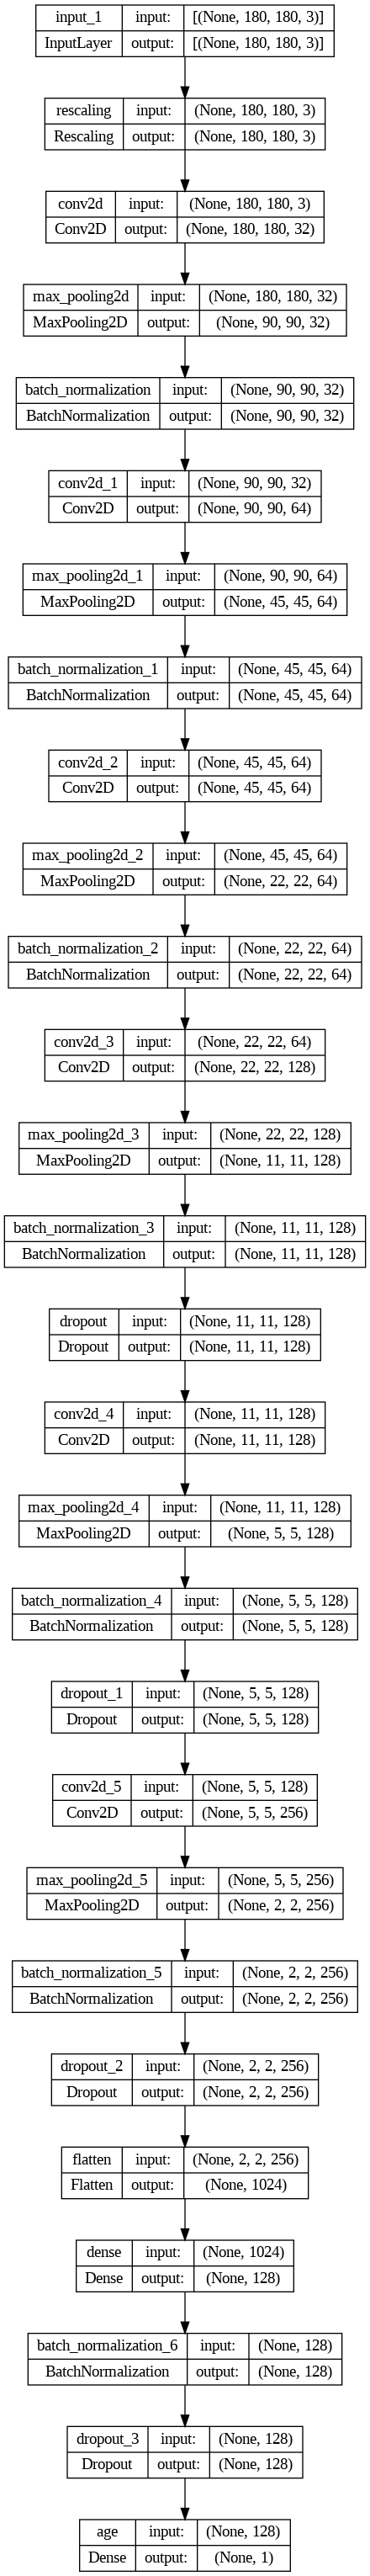

In [ ]:
from keras.utils import plot_model
plot_model(model_age,show_shapes=True)

In [ ]:
model_age.compile(optimizer='adam',
              loss={'age': 'mean_squared_error'},
              metrics={'age': 'mae'})

In [ ]:
from keras.callbacks import ModelCheckpoint

# Define the filepath to save the best model with lowest validation mean abs error
filepath = "best_model_age.h5"

# Define a callback to save the best model during training
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

In [ ]:
history_age = model_age.fit(train_generator_age, batch_size=32, epochs=30, validation_data=test_generator_age, callbacks=[checkpoint])

Epoch 1/30
411/411 [==============================] - ETA: 0s - loss: 1084.9799 - mae: 27.8516
Epoch 1: val_mae improved from inf to 23.65947, saving model to best_model_age.h5
411/411 [==============================] - 153s 327ms/step - loss: 1084.9799 - mae: 27.8516 - val_loss: 789.9224 - val_mae: 23.6595
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


411/411 [==============================] - ETA: 0s - loss: 268.3312 - mae: 12.8112
Epoch 2: val_mae improved from 23.65947 to 10.40021, saving model to best_model_age.h5
411/411 [==============================] - 125s 304ms/step - loss: 268.3312 - mae: 12.8112 - val_loss: 180.2276 - val_mae: 10.4002
Epoch 3/30
411/411 [==============================] - ETA: 0s - loss: 217.8767 - mae: 11.5565
Epoch 3: val_mae did not improve from 10.40021
411/411 [==============================] - 124s 301ms/step - loss: 217.8767 - mae: 11.5565 - val_loss: 184.1654 - val_mae: 10.4405
Epoch 4/30
411/411 [==============================] - ETA: 0s - loss: 204.9523 - mae: 11.1515
Epoch 4: val_mae did not improve from 10.40021
411/411 [==============================] - 123s 298ms/step - loss: 204.9523 - mae: 11.1515 - val_loss: 179.9433 - val_mae: 10.5749
Epoch 5/30
411/411 [==============================] - ETA: 0s - loss: 184.9531 - mae: 10.6141
Epoch 5: val_mae improved from 10.40021 to 9.43668, saving mo

In [ ]:
from keras.models import load_model

# Load the best model
best_model_age = load_model("best_model_age.h5")

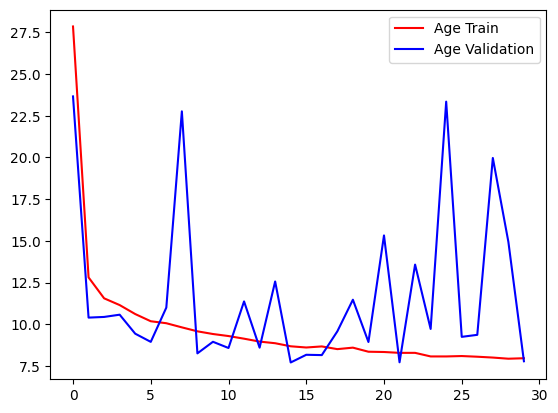

In [ ]:
plt.plot(history_age.history['mae'],color='red',label='Age Train')
plt.plot(history_age.history['val_mae'],color='blue',label='Age Validation')
plt.legend()
plt.show()

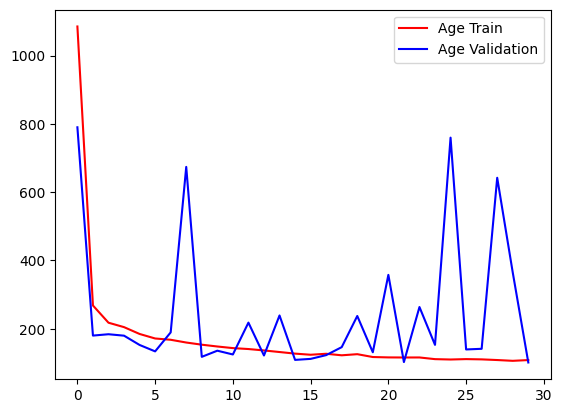

In [ ]:
plt.plot(history_age.history['loss'],color='red',label='Age Train')
plt.plot(history_age.history['val_loss'],color='blue',label='Age Validation')
plt.legend()
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator_gender = train_datagen.flow_from_dataframe(train_df,
                                                            directory=folder_path,
                                                            x_col='img',
                                                            y_col='gender',
                                                            target_size=(180,180),
                                                            batch_size=32,
                                                            class_mode='raw')

test_generator_gender = test_datagen.flow_from_dataframe(test_df,
                                                          directory=folder_path,
                                                          x_col='img',
                                                          y_col='gender',
                                                          target_size=(180,180),
                                                          batch_size=32,
                                                          class_mode='raw')


Found 13123 validated image filenames.
Found 3281 validated image filenames.


In [ ]:
# Define the input layer
inputs = Input(shape=(180, 180, 3))
x = Rescaling(1./255)(inputs)

# First Convolutional layer with batch normalization
x = Conv2D(32, kernel_size=(3,3), activation='relu', kernel_initializer="he_normal", padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)

# Second Convolutional layer with batch normalization
x = Conv2D(64, kernel_size=(3,3), activation='relu', kernel_initializer="he_normal", padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)

# Third Convolutional layer with batch normalization
x = Conv2D(128, kernel_size=(3,3), activation='relu', kernel_initializer="he_normal", padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Dropout(0.45)(x)

# Fourth Convolutional layer with batch normalization
x = Conv2D(256, kernel_size=(3,3), activation='relu', kernel_initializer="he_normal", padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Dropout(0.45)(x)

# Flatten Layer
x = Flatten()(x)

# Branch 1
dense1 = Dense(128, activation='relu')(x)
dense1 = BatchNormalization()(dense1)
dense1 = Dropout(0.4)(dense1)

output1 = Dense(1, activation='sigmoid', name='gender')(dense1)

# Define the model
model_gender = Model(inputs=inputs, outputs=[output1])

In [ ]:
model_gender.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_7 (Bat  (None, 90, 90, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 64)        1849

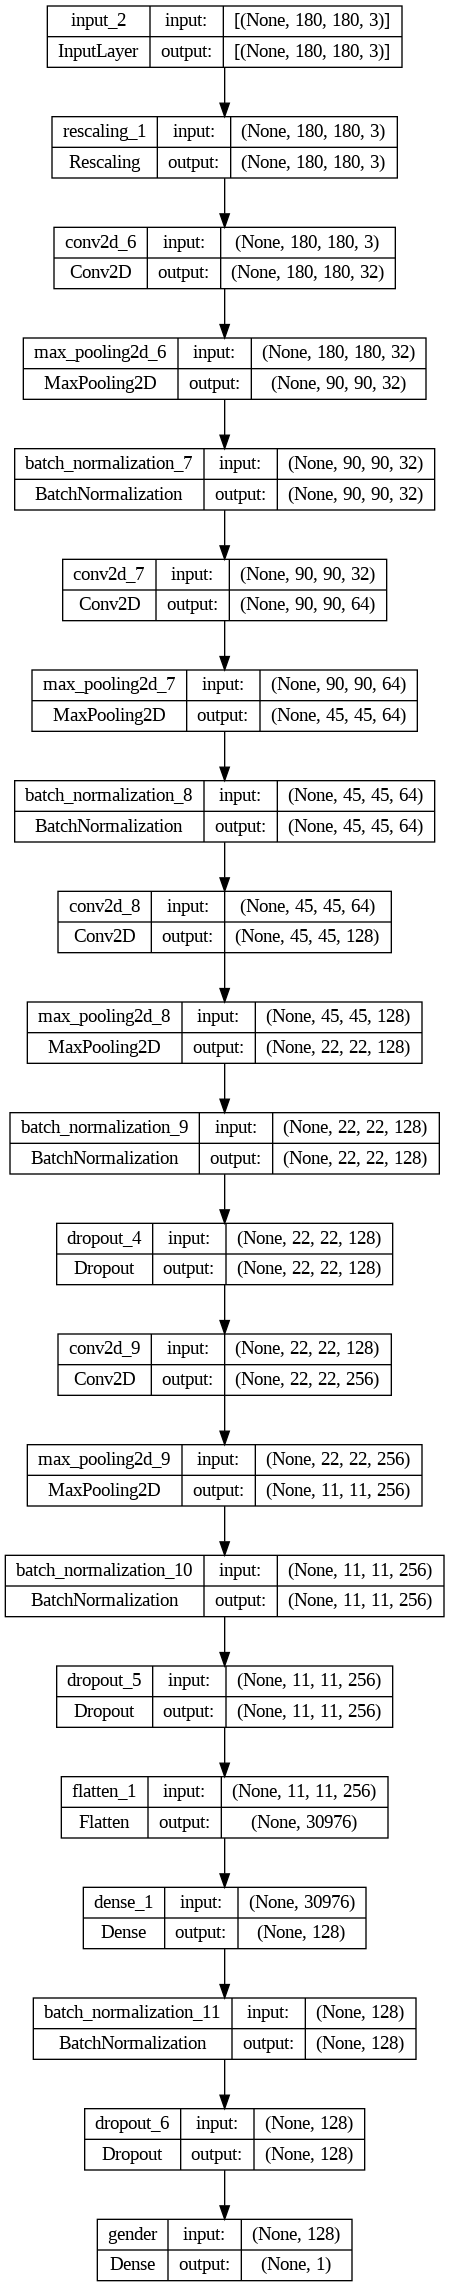

In [ ]:
from keras.utils import plot_model
plot_model(model_gender,show_shapes=True)

In [ ]:
model_gender.compile(optimizer='adam',
              loss={'gender': 'binary_crossentropy'},
              metrics={'gender': 'accuracy'})

In [ ]:
from keras.callbacks import ModelCheckpoint

# Define the filepath to save the best model with lowest validation mean abs error
filepath = "best_model_gender.h5"

# Define a callback to save the best model during training
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
history_gender = model_gender.fit(train_generator_gender, batch_size=32, epochs=30, validation_data=test_generator_gender, callbacks=[checkpoint])

Epoch 1/30
411/411 [==============================] - ETA: 0s - loss: 0.3875 - accuracy: 0.8229
Epoch 1: val_accuracy improved from -inf to 0.85949, saving model to best_model_gender.h5
411/411 [==============================] - 126s 305ms/step - loss: 0.3875 - accuracy: 0.8229 - val_loss: 0.3206 - val_accuracy: 0.8595
Epoch 2/30
411/411 [==============================] - ETA: 0s - loss: 0.3671 - accuracy: 0.8353
Epoch 2: val_accuracy improved from 0.85949 to 0.86589, saving model to best_model_gender.h5
411/411 [==============================] - 126s 306ms/step - loss: 0.3671 - accuracy: 0.8353 - val_loss: 0.3090 - val_accuracy: 0.8659
Epoch 3/30
411/411 [==============================] - ETA: 0s - loss: 0.3559 - accuracy: 0.8409
Epoch 3: val_accuracy improved from 0.86589 to 0.86711, saving model to best_model_gender.h5
411/411 [==============================] - 124s 301ms/step - loss: 0.3559 - accuracy: 0.8409 - val_loss: 0.3189 - val_accuracy: 0.8671
Epoch 4/30
411/411 [===========

In [ ]:
from keras.models import load_model

# Load the best model
best_model_gender = load_model("best_model_gender.h5")

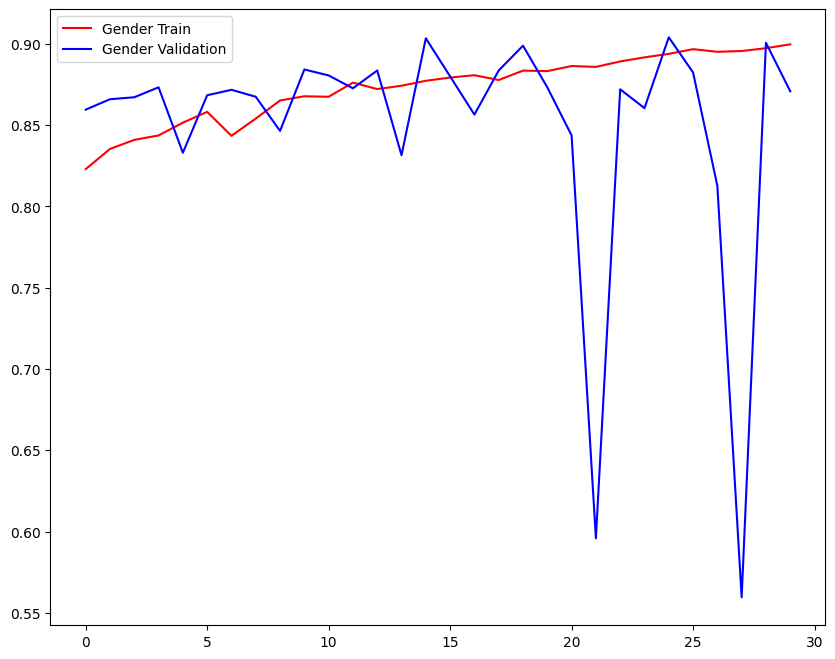

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history_gender.history['accuracy'],color='red',label='Gender Train')
plt.plot(history_gender.history['val_accuracy'],color='blue',label='Gender Validation')
plt.legend()
plt.show()

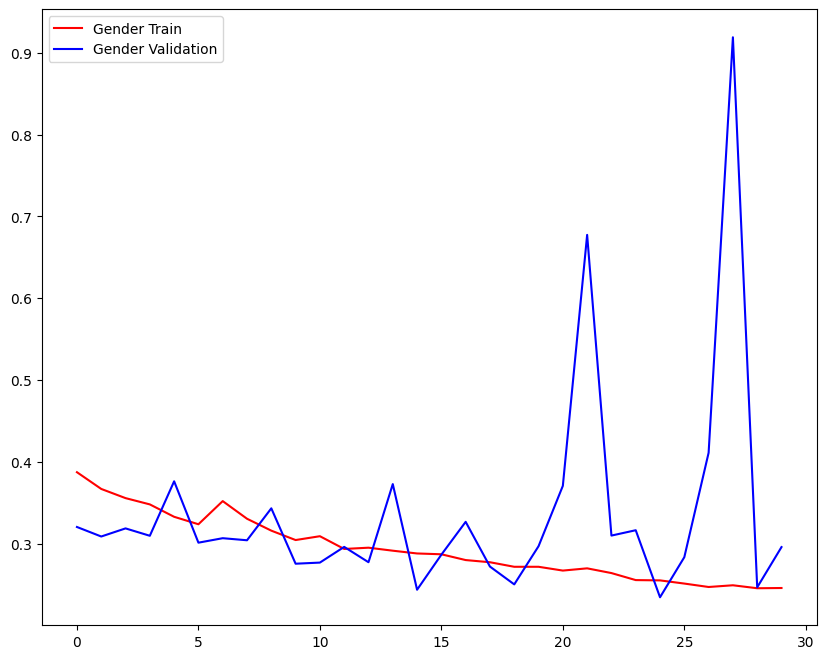

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history_gender.history['loss'],color='red',label='Gender Train')
plt.plot(history_gender.history['val_loss'],color='blue',label='Gender Validation')
plt.legend()
plt.show()

Results and Observation :


Best Model for Gender : Epoch 25th  
Best Model for Age : Epoch 15th


There were higher oscillation seen during the changing of gradient descent weights at every mini batch size of 32. After every dip, the weights value got incrementally high

The graident descent with good convergence was saved as best model of highest validation accuracy which also corresponded to having low validation and training loss.